# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
!pip install pandas

In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install scikit-learn

In [4]:
!pip install mlflow

  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached graphql_core-3.2.6-py3-none-any.whl.metadata (11 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
Using cached mlflow-2.22.0-py3-none-any.whl (29.0 MB)
Using cached mlflow_skinny-2.22.0-py3-none-any.whl (6.3 MB)
Using cached docker-7.1.0-py3-none-any.whl (147 kB)
Using cached graphene-3.4.3-py2.py3-none-any.whl (114 kB)
Using cached waitress-3.0.2-py3-none-any.whl (56 kB

In [5]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
#Type your code here
#Type your code here
# Load dataset dari URL
url = "https://raw.githubusercontent.com/Ezraliano/Eksperimen_SML_Ezraliano/refs/heads/main/Crop_recommendation.csv"
df = pd.read_csv(url)

# Tampilkan beberapa baris pertama
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

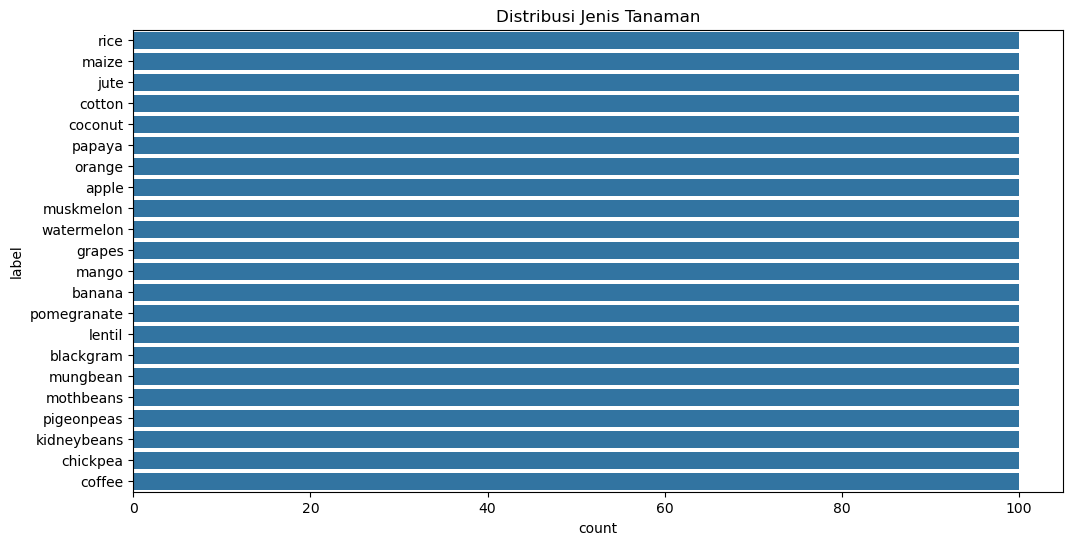

In [8]:
#Type your code here
# Informasi dataset
print(df.info())

# Statistik deskriptif
print(df.describe())

# Cek jumlah kelas pada target 'label'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title("Distribusi Jenis Tanaman")
plt.show()



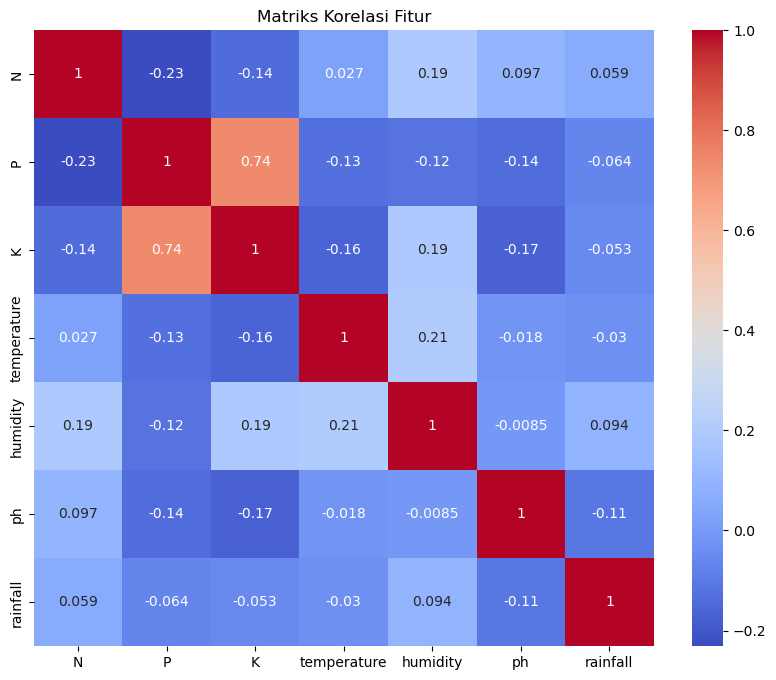

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
# Drop the non-numeric 'label' column before calculating correlation
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

In [10]:
# Pengecekan Outliers menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print("\nPengecekan Outliers:")
for column in df.select_dtypes(include=[np.number]).columns:
    count, lower, upper = detect_outliers(df, column)
    print(f"Kolom {column}: {count} outliers (Batas bawah: {lower:.2f}, Batas atas: {upper:.2f})")


Pengecekan Outliers:
Kolom N: 0 outliers (Batas bawah: -73.88, Batas atas: 179.12)
Kolom P: 138 outliers (Batas bawah: -32.00, Batas atas: 128.00)
Kolom K: 200 outliers (Batas bawah: -23.50, Batas atas: 92.50)
Kolom temperature: 86 outliers (Batas bawah: 14.08, Batas atas: 37.25)
Kolom humidity: 30 outliers (Batas bawah: 15.73, Batas atas: 134.48)
Kolom ph: 57 outliers (Batas bawah: 4.54, Batas atas: 8.35)
Kolom rainfall: 100 outliers (Batas bawah: -25.02, Batas atas: 213.84)



Skewness Fitur Numerik:
N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


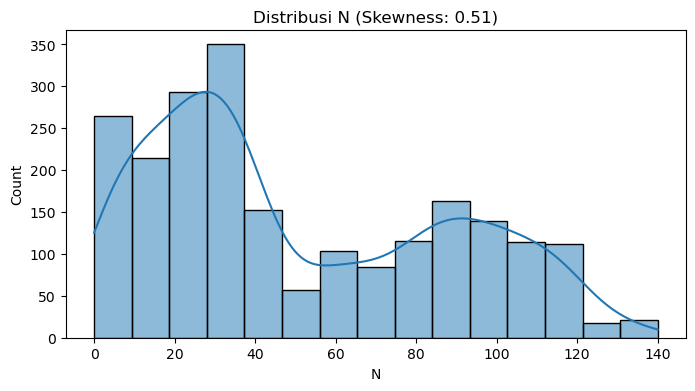

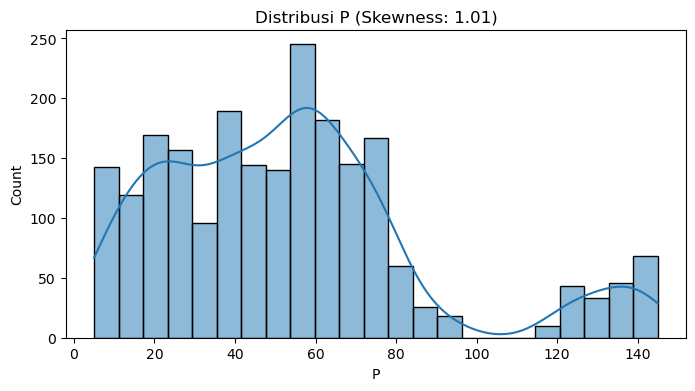

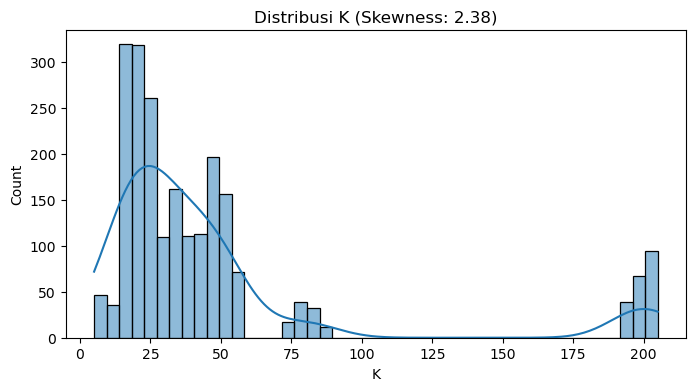

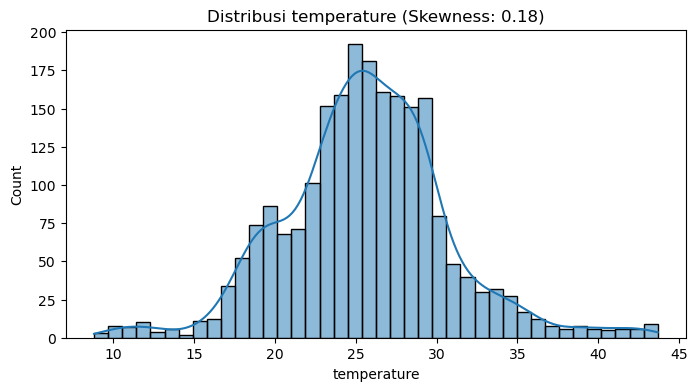

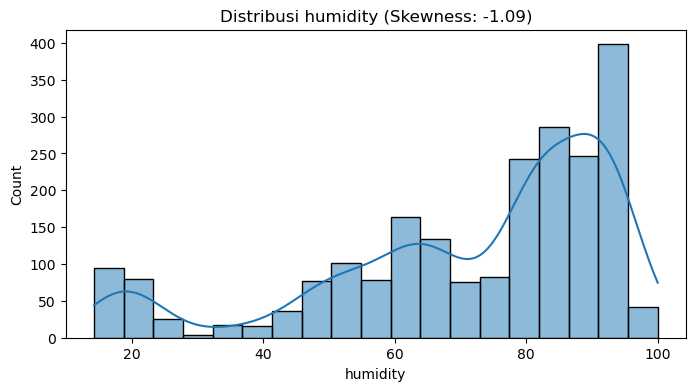

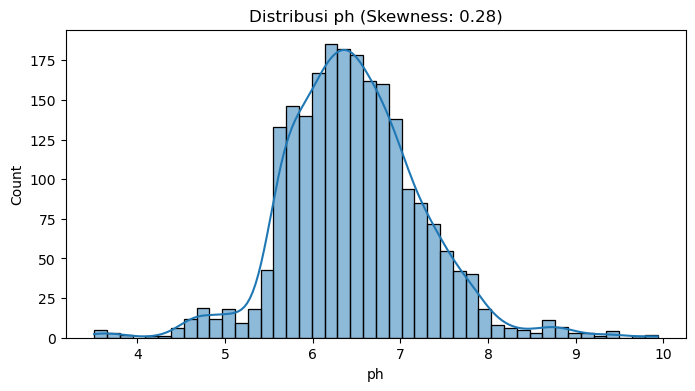

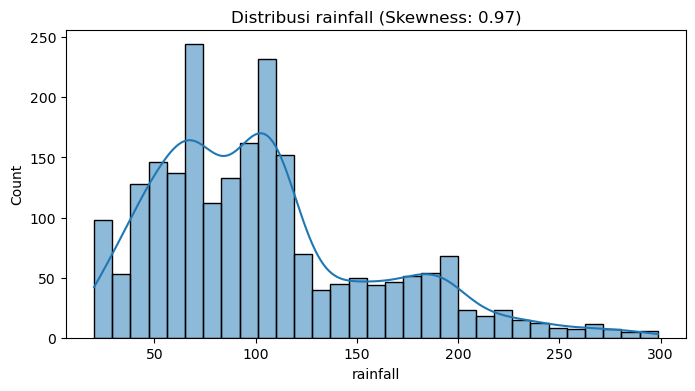

In [11]:
# Pengecekan Skewness
print("\nSkewness Fitur Numerik:")
skewness = df.select_dtypes(include=[np.number]).skew()
print(skewness)

# Visualisasi distribusi fitur numerik untuk melihat skewness
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribusi {column} (Skewness: {df[column].skew():.2f})")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.
Berikut adalah tahapan-tahapan yang bisa dilakukan :
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier


In [12]:
# Memisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Memeriksa nilai duplikat
print("Jumlah data duplikat sebelum penghapusan:", df.duplicated().sum())

Jumlah data duplikat sebelum penghapusan: 0


In [14]:
# Memeriksa nilai kosong / missing values
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())


Jumlah nilai kosong per kolom:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [15]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:

# Gabungkan X_scaled (fitur yang sudah distandarisasi) dan y (label) ke satu DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['label'] = y.values

# Ekspor ke satu file CSV
X_scaled_df.to_csv('Crop_recommendation_prepocessing.csv', index=False)